In [440]:
%matplotlib inline
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import math

## Read the Dataset

In [441]:
N = 51
data = loadmat('ex6data1.mat')
x = data['X']
y = data['y']
# print(type(y))
color = []
colors = y.ravel()

def setColor(mylist, colorlist):
    for i in mylist:
        if i==0:
            colorlist.append('r')
        else: 
            colorlist.append('b')

setColor(colors, color)
# data
# y

# Split dataset for train and test

In [442]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=123)
clf = svm.SVC(kernel='linear')
clf.fit(X_train, np.ravel(y_train))
y_true, y_pred = y_test, clf.predict(X_test)

## Plot the data

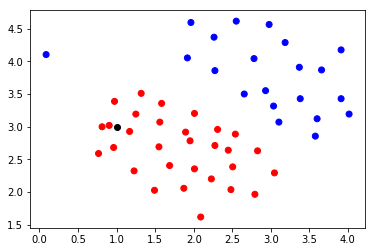

In [443]:
test = [1, 3]

def plotData(X):
    dx, dy = X.T
    plt.scatter(dx, dy, c=color)
    plt.scatter(test[0], test[1], c='black')
plotData(x)

#### Create and Visualize kNN

4 nearest neighbours: [array([0.9044, 3.0198]), array([1.1693, 2.9276]), array([0.8122, 2.9992]), array([1.25  , 3.1937])]


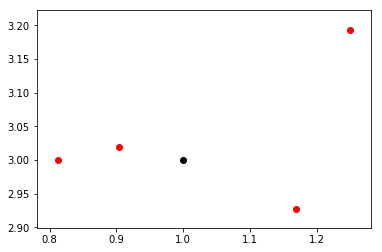

In [451]:
def getDistance(var1, var2):
    return math.sqrt((var1[0] - var2[0])**2 + (var1[1] - var2[1])**2)

# print(getDistance(X_test[1],X_test[2]))

def getNeighbors(someSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(someSet)):
        dist = getDistance(testInstance, someSet[x])
        distances.append((someSet[x], dist))
    distances.sort(key=lambda x: x[1])
    neighbors = []
    for x in range(k):
#         print(distances[x][0])
        neighbors.append(distances[x][0])
    return neighbors

k = 4
neighbors = getNeighbors(X, test, k)
print(k, "nearest neighbours:", neighbors)

def showNeighbors(neighbors, test):
    xs = [x[0] for x in neighbors]
    ys = [x[1] for x in neighbors]
    plt.scatter(xs, ys, c='red')
    plt.scatter(test[0],test[1], c='black')

showNeighbors(neighbors, test)

## Compute accuracy

In [445]:
def accuracy_score(y_true, y_pred):
    samecounter = 0
    arraysize = y_pred.size
    for i in range(arraysize):
        if(y_pred[i] == y_true[i]):
            samecounter += 1    
    print("Accuracy is about", (samecounter/arraysize)*100, "%")

accuracy_score(y_true, y_pred)

Accuracy is about 100.0 %


## Create LinearSVC and train your data

In [446]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, np.ravel(y_train))

yTrue, pred = y_test, clf.predict(x_test)

## Compute accuracy

In [447]:
accuracy_score(yTrue, pred)

Accuracy is about 100.0 %


## Visualize the Decision Boundary

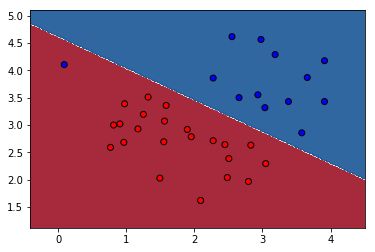

In [448]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

color.clear()
colors = y_train.ravel()

setColor(colors, color)

plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.9)
plt.scatter(X_train[:, 0], X_train[:, 1], c=color, edgecolor='black')
plt.show()